# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get Data into data frame

In [2]:
fraud_check = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\13.Random Forests\\Fraud_check.csv")
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Analyse Data

In [3]:
print("Number of rows: ", len(fraud_check))
print("Number of columns: ",len(fraud_check.columns))
print("Number of rows and columns: ",fraud_check.shape)
print("Number of elements: ",fraud_check.size)
# print("Number of rows, columns, etc: ", fraud_check.info())
# print ("Data type:\n",fraud_check.dtypes)
# print ("Identify outliers & other info like Mean,median,max,min etc:\n\n",fraud_check.describe())

Number of rows:  600
Number of columns:  6
Number of rows and columns:  (600, 6)
Number of elements:  3600


Rename column for convinence

In [4]:
fraud_check=fraud_check.rename(columns={'Marital.Status': 'Marital_Status', 'Taxable.Income':'Taxable_Income', 
                          'City.Population':'City_Population', 'Work.Experience':'Work_Experience'})
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Assign range for taget column as per problem statement

In [5]:
fraud_check['income_range'] = np.where(fraud_check['Taxable_Income']>=30000, 'Good', 'Risky')
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


# Visualize data

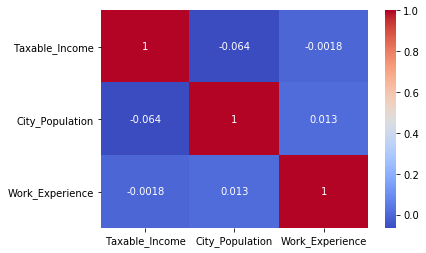

In [6]:
#Correlation heatmap
corr = fraud_check.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

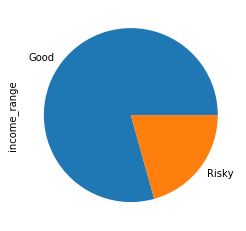

Good     476
Risky    124
Name: income_range, dtype: int64


In [7]:
fraud_check['income_range'].value_counts().plot.pie()
plt.show()
print(fraud_check['income_range'].value_counts())

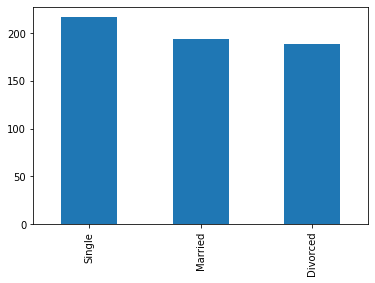

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [8]:
fraud_check['Marital_Status'].value_counts(sort=True).plot.bar()
plt.show()
print(fraud_check['Marital_Status'].value_counts())

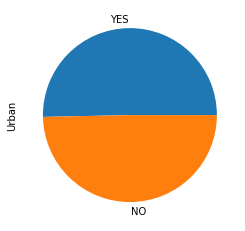

YES    302
NO     298
Name: Urban, dtype: int64


In [9]:
fraud_check['Urban'].value_counts().plot.pie()
plt.show()
print(fraud_check['Urban'].value_counts())

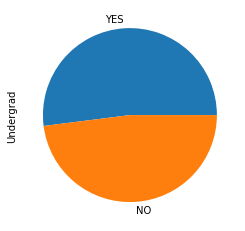

YES    312
NO     288
Name: Undergrad, dtype: int64


In [10]:
fraud_check['Undergrad'].value_counts().plot.pie()
plt.show()
print(fraud_check['Undergrad'].value_counts())

LabelEncoder encode labels with a value between 0 and n_classes-1

In [11]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
fraud_check1 = fraud_check[['Undergrad','Urban']].apply(label.fit_transform)
fraud_check1 = fraud_check1.rename(columns={'Undergrad':'Undergrad_num','Urban':'Urban_num'})
fraud_check1.head()

,Undergrad_num,Urban_num
0,0,1
1,1,1
2,0,1
3,1,1
4,0,0


In [12]:
fraud_check = pd.get_dummies(fraud_check, columns=['Marital_Status'])
fraud_check

,Undergrad,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,NO,68833,50047,10,YES,Good,0,0,1
1,YES,33700,134075,18,YES,Good,1,0,0
2,NO,36925,160205,30,YES,Good,0,1,0
3,YES,50190,193264,15,YES,Good,0,0,1
4,NO,81002,27533,28,NO,Good,0,1,0
...,...,...,...,...,...,...,...,...,...
595,YES,76340,39492,7,YES,Good,1,0,0
596,YES,69967,55369,2,YES,Good,1,0,0
597,NO,47334,154058,0,YES,Good,1,0,0
598,YES,98592,180083,17,NO,Good,0,1,0


In [13]:
fraud_check = pd.concat([fraud_check,fraud_check1], axis=1, sort=False)
fraud_check.head()

,Undergrad,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Undergrad_num,Urban_num
0,NO,68833,50047,10,YES,Good,0,0,1,0,1
1,YES,33700,134075,18,YES,Good,1,0,0,1,1
2,NO,36925,160205,30,YES,Good,0,1,0,0,1
3,YES,50190,193264,15,YES,Good,0,0,1,1,1
4,NO,81002,27533,28,NO,Good,0,1,0,0,0


In [14]:
fraud_check =fraud_check.drop(columns={'Undergrad','Urban'},axis=1)
fraud_check.head()

,Taxable_Income,City_Population,Work_Experience,income_range,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Undergrad_num,Urban_num
0,68833,50047,10,Good,0,0,1,0,1
1,33700,134075,18,Good,1,0,0,1,1
2,36925,160205,30,Good,0,1,0,0,1
3,50190,193264,15,Good,0,0,1,1,1
4,81002,27533,28,Good,0,1,0,0,0


In [15]:
fraud_check = fraud_check[['Taxable_Income','City_Population','Work_Experience','Undergrad_num',
                           'Urban_num','Marital_Status_Divorced','Marital_Status_Married',
                           'Marital_Status_Single','income_range']]
fraud_check.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_num,Urban_num,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,income_range
0,68833,50047,10,0,1,0,0,1,Good
1,33700,134075,18,1,1,1,0,0,Good
2,36925,160205,30,0,1,0,1,0,Good
3,50190,193264,15,1,1,0,0,1,Good
4,81002,27533,28,0,0,0,1,0,Good


In [16]:
colnames=list(fraud_check.columns)
predictors = colnames[:8]
target=colnames[8]
print("predictors:\n",predictors)
print("target:\n",target)

predictors:
 ['Taxable_Income', 'City_Population', 'Work_Experience', 'Undergrad_num', 'Urban_num', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single']
target:
 income_range


In [17]:
X = fraud_check[predictors]
Y = fraud_check[target]

# model Building

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(X,Y) # Fitting RandomForestClassifier model from sklearn.ensemble 

C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
#### Attributes that comes along with RandomForest function
rf.estimators_ 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.
rf.n_outputs_ # Number of outputs when fit performed
rf.oob_score_  

0.9933333333333333

In [20]:
rf.predict(X)
fraud_check['rf_pred'] = rf.predict(X)
cols = ['rf_pred','income_range']
fraud_check[cols].head()
fraud_check["income_range"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: income_range, Length: 600, dtype: object

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(fraud_check["income_range"],fraud_check['rf_pred']) # Confusion matrix

pd.crosstab(fraud_check["income_range"],fraud_check['rf_pred'])

rf_pred,Good,Risky
income_range,,
Good,476,0
Risky,0,124


In [22]:
print("Accuracy = ",(476+124)/(476+124)*100)

Accuracy =  100.0
